In [1]:
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np
import pandas as pd
import base
from io import StringIO

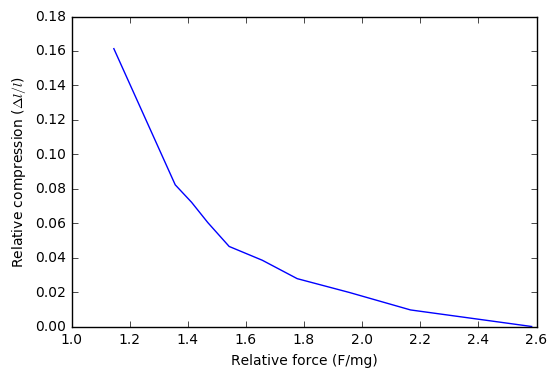

In [31]:
# Measure krel = F/mg / (dl/l)
# in large model, 10 pt average at t=0.300 s, FREQ=0, PHASE=180, MAX_TORQUE=20, MAX_VEL=1145.92
# Weight = chassis weight + 0.5e-4 kg
# dl/l = (uncompressed - compressed height)/uncompressed
data = """Weight (kg),Fz (N),Chassis (m)
1.50E-04,3.875E-03,1.872E-02
2.00E-04,4.333E-03,1.854E-02
2.50E-04,4.890E-03,1.835E-02
3.00E-04,5.330E-03,1.820E-02
3.50E-04,5.798E-03,1.800E-02
4.00E-04,6.170E-03,1.785E-02
4.50E-04,6.610E-03,1.759E-02
5.00E-04,7.066E-03,1.737E-02
5.50E-04,7.463E-03,1.718E-02
1.05E-03,1.203E-02,1.570E-02
#1.55E-03,8.542E-03,9.964E-03 # sampled at t=1.500
#2.55E-03,1.376E-02,8.117E-03 # sampled at t=0.750
#5.05E-03,2.463E-02,6.475E-03 # took longer to stabilize, sampled at t=0.500
# collapses for larger weights, min Chassis height 4.354e-3
"""
t = pd.read_csv(StringIO(data), comment='#')
length_0 = t['Chassis (m)'][0]

plot.plot(t['Fz (N)']/(t['Weight (kg)']*10), 1-t['Chassis (m)']/length_0)
plot.xlabel('Relative force (F/mg)')
plot.ylabel('Relative compression ($\Delta l/l$)')
# plot.title('F vs dl, relative (10x model)')

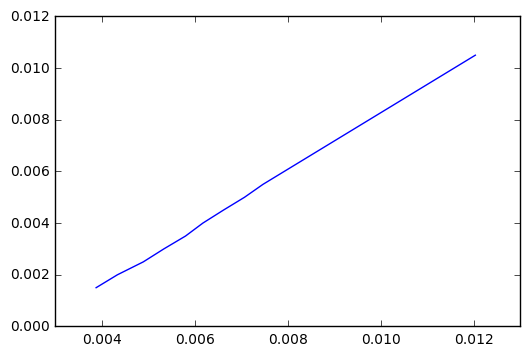

In [35]:
plot.plot(t['Fz (N)'], t['Weight (kg)']*10)

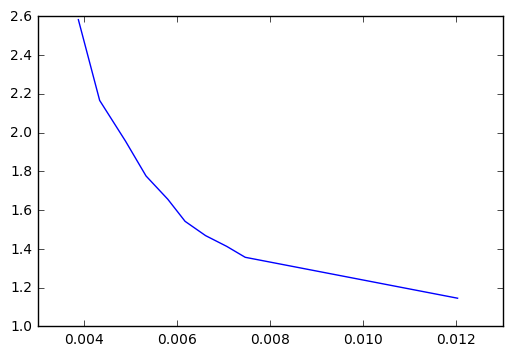

In [34]:
plot.plot(t['Fz (N)'], t['Fz (N)']/(t['Weight (kg)']*10))

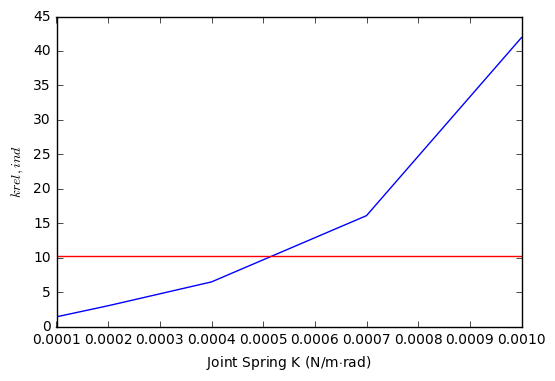

In [36]:
# krel in large model, 10 pt average at t=0.300 s, FREQ=0, PHASE=180, MAX_TORQUE=20, MAX_VEL=1145.92
weight = 5.00e-4 # kg
mg = weight * 10 # N
# collapses for K=0
data = """Spring K (N/m),Fz (N),Chassis (m)
1.00E-04,6.423E-03,1.302E-02
2.00E-04,6.785E-03,1.591E-02
4.00E-04,7.054E-03,1.736E-02
7.00E-04,7.092E-03,1.817E-02
1.00E-03,7.058E-03,1.851E-02
#2.00E-03,7.391E-03,1.916E-02 # maxes out Chassis height
#1.00E-02,7.091E-03,1.934E-02
"""
t = pd.read_csv(StringIO(data), comment='#')
krel = t['Fz (N)']/mg / (1 - t['Chassis (m)']/length_0)/3
plot.plot(t['Spring K (N/m)'], krel)
plot.axhline(y=10.3, color='r')
plot.xlabel('Joint Spring K (N/m$\cdot$rad)')
plot.ylabel('$krel,ind$')
# plot.title('Spring K vs krel (10x model)')

In [19]:
# Extended telemetry with correct mass
t = base.process('sim_v8_180.csv')
base.setPlot(plot)

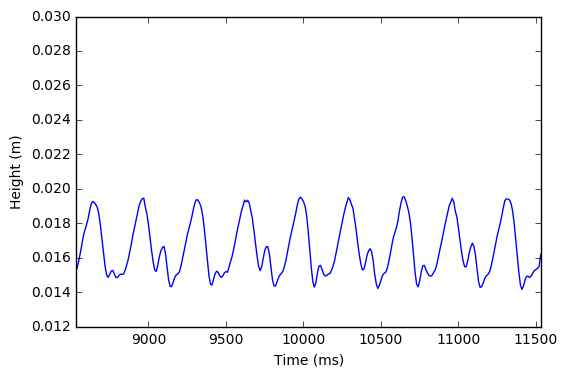

In [20]:
# The VelociROACH moves 0.1 m/s at 1.5 Hz; turns 180 degrees in 10 s
plot.plot(t.time, t.z, 'b')
base.tWidth(t)
plot.xlabel('Time (ms)')
plot.ylabel('Height (m)')
# plot.title('z Motion')

Sample force sensor readout; total force = norm(Fx, Fy, Fz)


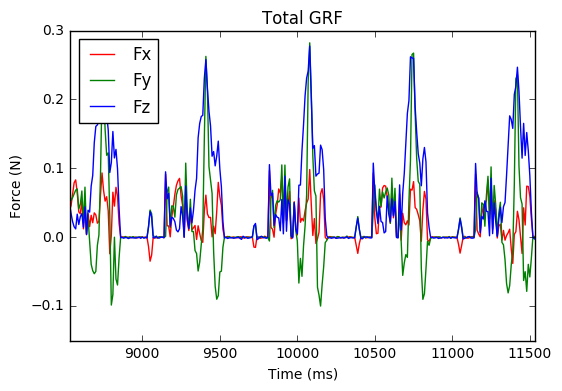

In [5]:
base.plotFXYZ(t)
plot.title('Total GRF')

In [25]:
# k_rel = (F/mg) / (dl/l)
# F = 0.3 N, m = 0.03 kg, g = 10 m/s
# dl = 0.05 m, l = 0.033 m

0.3/(0.03*10) / (0.06/0.033)

0.55

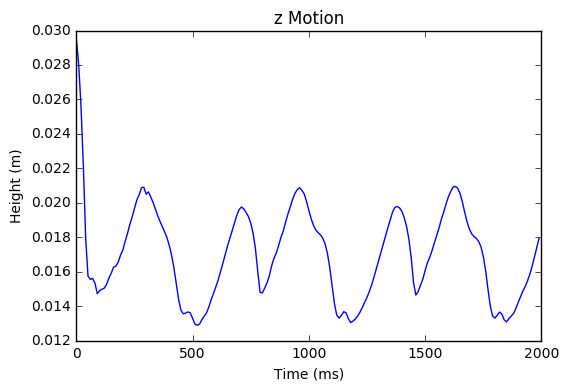

In [35]:
t2 = base.process('sim_v8_0.csv')
plot.plot(t2.time[:200], t2.z[:200], 'b')
plot.title('z Motion')
plot.xlabel('Time (ms)')
plot.ylabel('Height (m)')

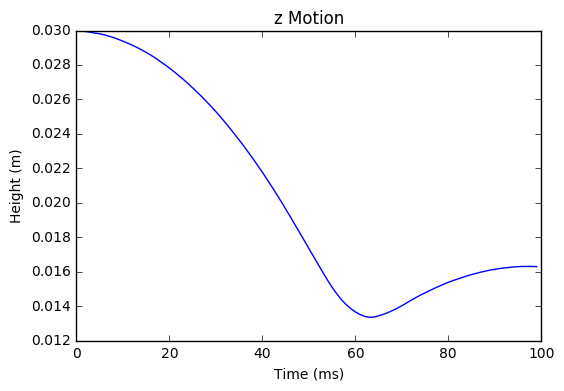

In [34]:
t3 = base.process('sim_v8_drop0.csv')
plot.plot(t3.time[:100], t3.z[:100], 'b')
plot.title('z Motion')
plot.xlabel('Time (ms)')
plot.ylabel('Height (m)')

# Position and Angle

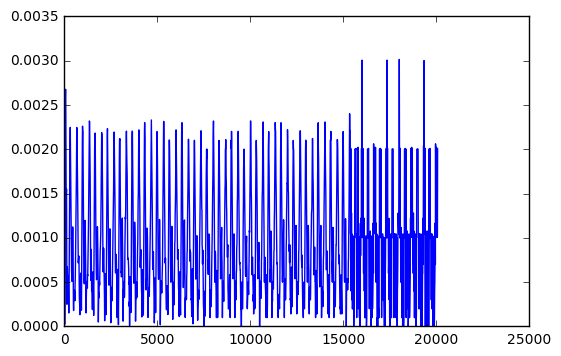

In [6]:
t['VelX'] = t.x.diff()
t['VelY'] = t.y.diff()
plot.plot(t.time, np.sqrt(np.square(t[['VelX','VelY']]).sum(axis=1)), 'b')

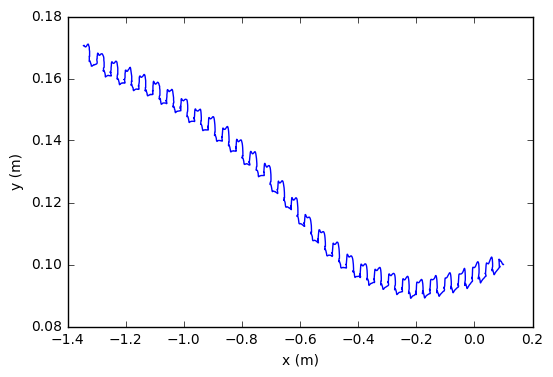

In [7]:
# Turns left
plot.plot(t.x, t.y, 'b')
plot.xlabel('x (m)')
plot.ylabel('y (m)')

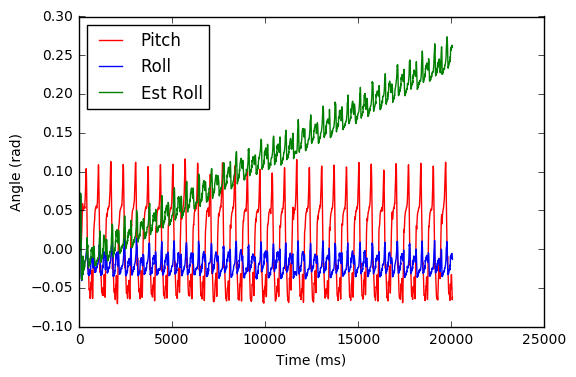

In [8]:
# Complicated dynamics: low-frequency changes, not periodic
# Est Roll from gyro drifts.. should remain near 0 because robot is on the ground
plot.plot(t.time, t.a, 'r', t.time, t.b, 'b', t.time, t.AngleY, 'g')
plot.xlabel('Time (ms)')
plot.ylabel('Angle (rad)')
plot.legend(['Pitch','Roll','Est Roll'], loc=2)

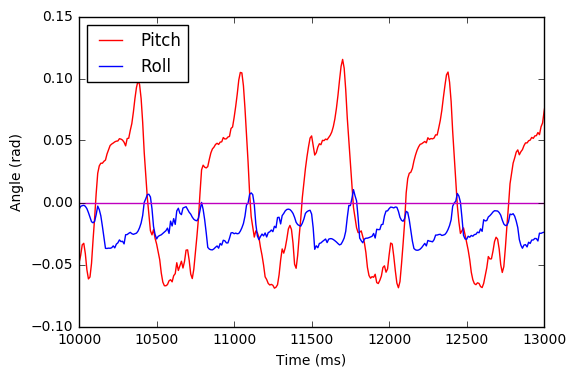

In [9]:
# Pitches forward when switching off, especially pronounced on right side
plot.plot(t.time, t.a, 'r', t.time, t.b, 'b')
plot.xlim([10e3,13e3])
plot.axhline(color='m')
plot.xlabel('Time (ms)')
plot.ylabel('Angle (rad)')
plot.legend(['Pitch','Roll'], loc=2)

# VelociROACH dynamics

Alternating tripod gait: roll right (positive) = LM force. Roll left = LF and LB force


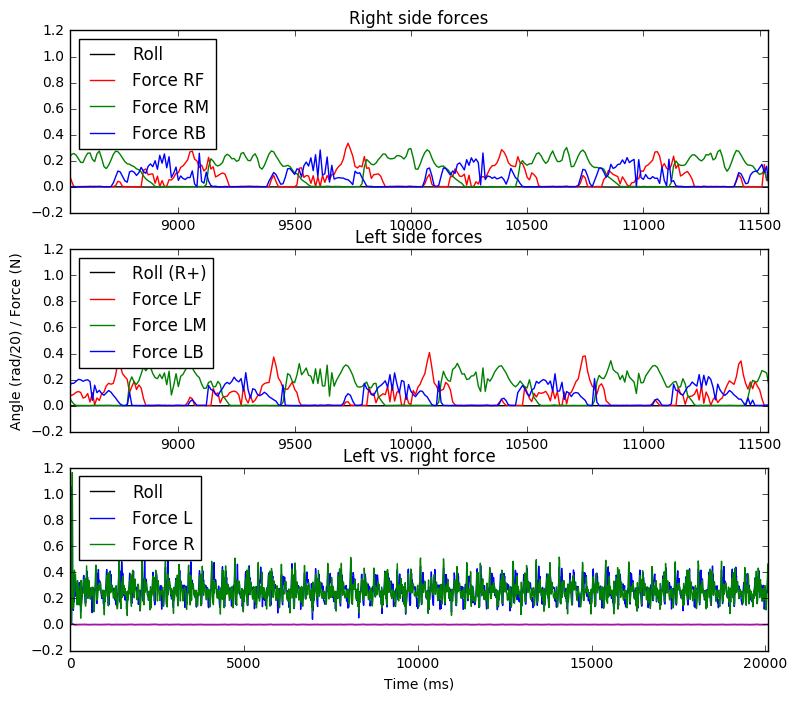

In [11]:
base.plotForceLR(t)

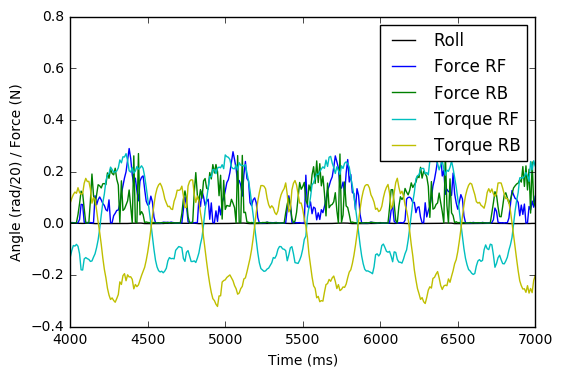

In [12]:
# Torques don't seem very useful
plot.plot(t.time, t.b/20, 'k', t.time, t.fRF, 'b', t.time, t.fRB, 'g',
          t.time, t.torqueR*50, 'c', t.time, t.torqueR1*50, 'y')
plot.xlim([4e3,7e3])
plot.xlabel('Time (ms)')
plot.ylabel('Angle (rad/20) / Force (N)')
plot.legend(['Roll','Force RF','Force RB','Torque RF','Torque RB'])

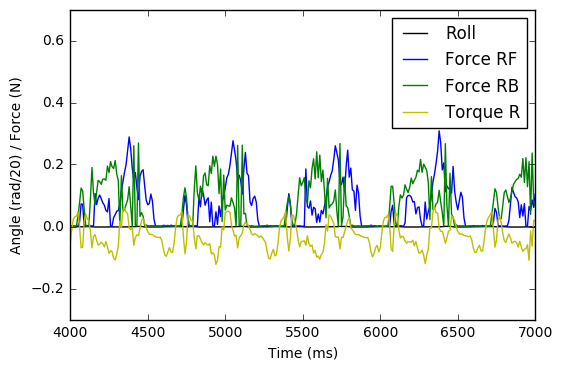

In [13]:
# Sum of forward and back motor torque, right side, still not useful
plot.plot(t.time, t.b/20, 'k', t.time, t.fRF, 'b', t.time, t.fRB, 'g',
          t.time, (t.torqueR+t.torqueR1)*50, 'y')
plot.xlim([4e3,7e3])
plot.xlabel('Time (ms)')
plot.ylabel('Angle (rad/20) / Force (N)')
plot.legend(['Roll','Force RF','Force RB','Torque R'])

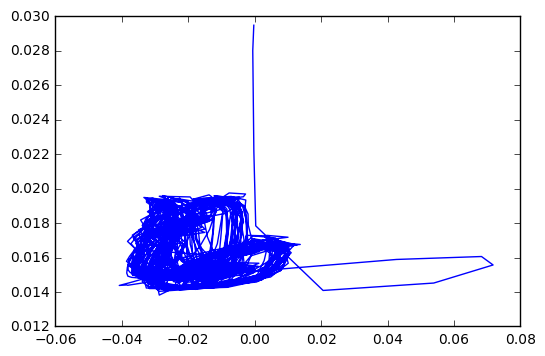

In [14]:
plot.plot(t.b, t.z, 'b')

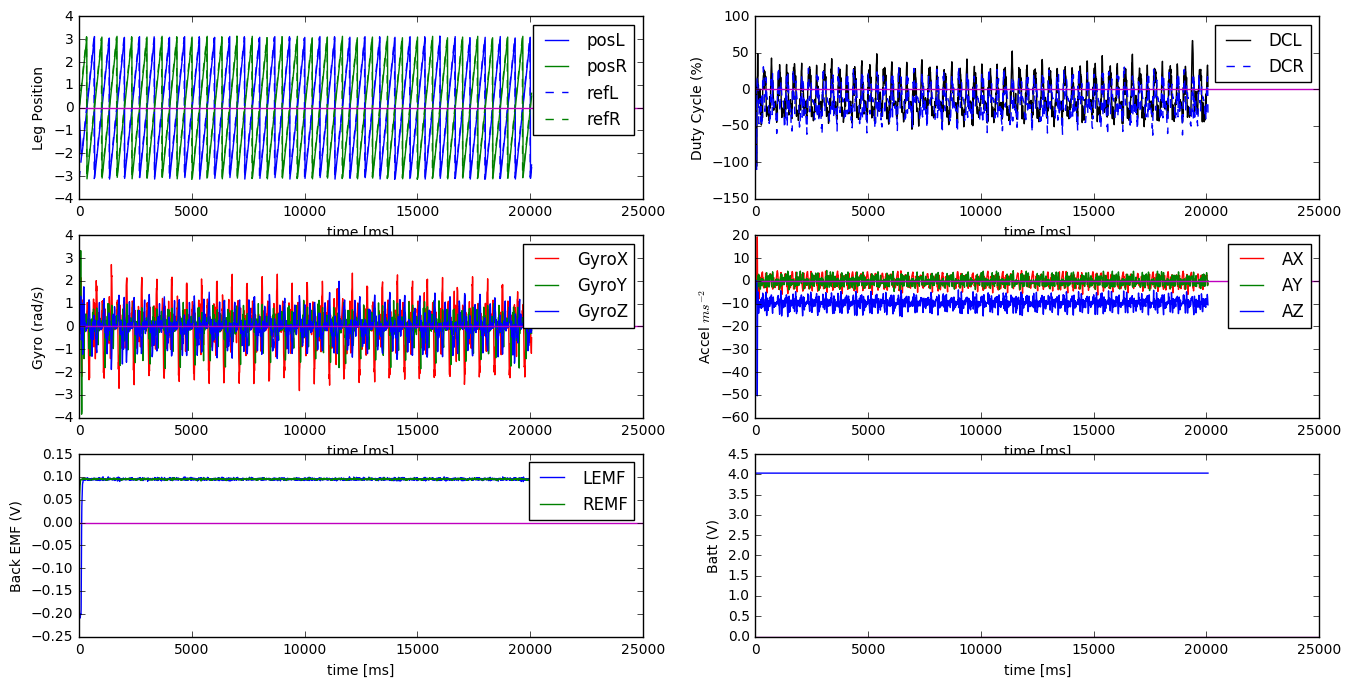

In [15]:
base.plotBasic(t)